#Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
myDirFiles = "/content/drive/MyDrive/Pandas"
os.chdir(myDirFiles)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Library

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns

#Data Loading

In [ ]:
df = pd.read_csv('marketing-churn.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Cek ukuran data

In [ ]:
df.shape

(2240, 28)

Cek tipe data

In [ ]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

Cek Missing Value

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Variable Income ada tanda spasi di depannya dan juga memiliki missing value sebanyak 24

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
#cek distribusi target
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

0 adalah tidak merespon campaign
dan 1 adalah yang merespon campaign
Maka dari itu pada kasus ini datanya adalah Imbalance

In [ ]:
#Memperbaiki penamaan variable Income
df['Income']=df[' Income ']
df = df.drop(' Income ', axis = 1)

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Income                 24
dtype: int64

Nama variable Income sudah diperbaiki dan sekarang kita akan melakukan perlakuan pada variable Income dengan cara menangani missing value dan mengubah isi data menjadi numerik

#Univariate Analysis

##Income

In [ ]:
 df['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

Kita akan mengubah menjadi integer

In [ ]:
def dollar_to_int(d):
  #input: d: String
  #kalau null, tidak perlu di convert
  if pd.isnull(d):
    return d
  else:
    d = d.strip() #menghilangkan spasi di depan dan belakang
    d = d[1:] #menghilangkan tanda dollar di awal dan menampilkan sisanya
    d = d[:-3] #menghilangkan 3 karakter yang di belakang
    d = d.replace(',','') #mengubah koma menjadi fungsi kosong
    return int(d)

#Idenya
input_dollar = '       $84,835.00       '
print(input_dollar)
print('output:', dollar_to_int (input_dollar)) #ekspektasi output: 84835)

#NaN --> di pandas tipenya float
df['Income_Real'] = df['Income'].apply(dollar_to_int)
df['Income_Real']

       $84,835.00       
output: 84835


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income_Real, Length: 2240, dtype: float64

Kita ingin melihat sebaran data Income terhadapa Response

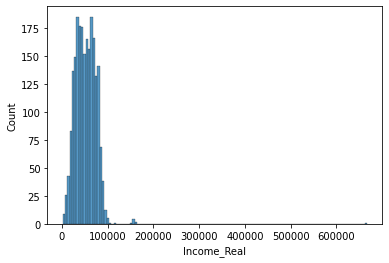

In [ ]:
sns.histplot(df, x='Income_Real')

Ternyata ada data yang terpisah yang disebabkan oleh outliers

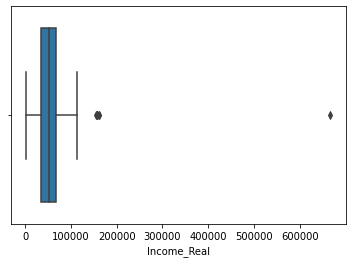

In [ ]:
#menghilangkan outliers
sns.boxplot(data = df, x='Income_Real')

Titik-titik tersebut merupakan outliers. Maka kita akan menggunakan IQR

In [ ]:
#IQR
Q1 = df['Income_Real'].quantile(.3)
Q3 = df['Income_Real'].quantile(.7)
IQR = Q3- Q1

In [ ]:
Q3 + (1.5 * IQR)

105821.0

In [ ]:
UPPER_LIMIT = Q3 + (1.5 * IQR)
df = df[df['Income_Real'] <= UPPER_LIMIT]

Kita lihat lagi histplot dan boxplotnya

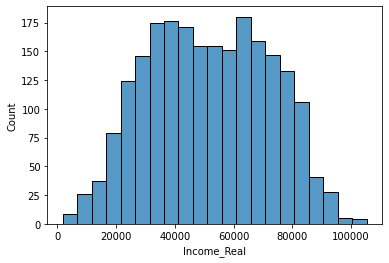

In [ ]:
sns.histplot(df, x='Income_Real')

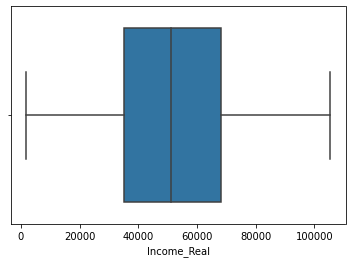

In [ ]:
sns.boxplot(data = df, x='Income_Real')

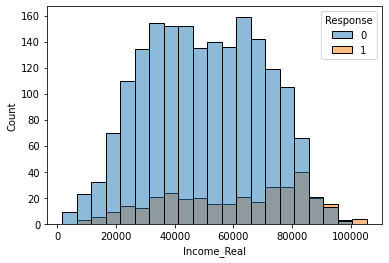

In [ ]:
sns.histplot(df, x='Income_Real', hue='Response')

Bootstrap \
Membedakan antara dua buah distribusi 

- Ide: dari setiap kelas, kita ambil sample. Kita cari rata-rata/median. 
- Lakukan sebanyak n kali. Rata-rata ini yang akan kita plot.

In [ ]:
BOOTS_RESULT =[]
for i in range(200):
  #sampling kelas response = 0
  mean_0 = df[df['Response'] == 0]['Income_Real'].sample(100).mean()
  mean_1 = df[df['Response'] == 1]['Income_Real'].sample(100).mean()

  BOOTS_RESULT.append((mean_0,0))
  BOOTS_RESULT.append((mean_1,1))

df_boots = pd.DataFrame(BOOTS_RESULT,columns = ['Avg_Income','Response'])

In [ ]:
df_boots

,Avg_Income,Response
0,47069.90,0
1,60771.39,1
2,51646.12,0
3,62075.15,1
4,52961.73,0
...,...,...
395,57355.67,1
396,47930.01,0
397,62174.57,1
398,49694.87,0


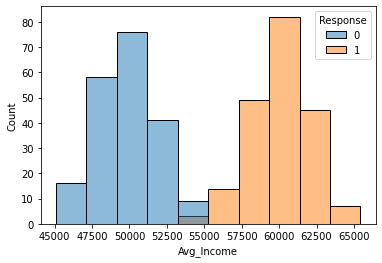

In [ ]:
sns.histplot(df_boots, x='Avg_Income', hue='Response')

Ternyata yang kemungkinan merespon campaign adalah yang memiliki income rata-rata 60k 

##Education

In [ ]:
df['Education'].value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       200
Basic           54
Name: Education, dtype: int64

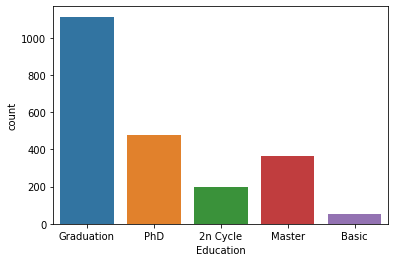

In [ ]:
sns.countplot( data=df, x='Education')

In [ ]:
df_edu = df.groupby(['Education','Response']).size()
df_edu

Education   Response
2n Cycle    0           178
            1            22
Basic       0            52
            1             2
Graduation  0           961
            1           152
Master      0           308
            1            56
PhD         0           375
            1           101
dtype: int64

Kita akan melakukan ploting terhadap hasil groupby

In [ ]:
df_edu.to_frame('Total_User')

Total_User
Education  Response            
2n Cycle   0                178
           1                 22
Basic      0                 52
           1                  2
Graduation 0                961
           1                152
Master     0                308
           1                 56
PhD        0                375
           1                101

In [ ]:
per_response = df.groupby(['Education','Response']).size().to_frame('Total_Per_Response')
per_education = df.groupby('Education').size().to_frame('Total_Per_Edu')

In [ ]:
per_education

,Total_Per_Edu
Education,
2n Cycle,200
Basic,54
Graduation,1113
Master,364
PhD,476


In [ ]:
joined = per_response.join(
    per_education,
    on='Education'
).reset_index()
joined

,Education,Response,Total_Per_Response,Total_Per_Edu
0,2n Cycle,0,178,200
1,2n Cycle,1,22,200
2,Basic,0,52,54
3,Basic,1,2,54
4,Graduation,0,961,1113
5,Graduation,1,152,1113
6,Master,0,308,364
7,Master,1,56,364
8,PhD,0,375,476
9,PhD,1,101,476


In [ ]:
joined['ratio'] = joined['Total_Per_Response'] / joined['Total_Per_Edu']
joined

,Education,Response,Total_Per_Response,Total_Per_Edu,ratio
0,2n Cycle,0,178,200,0.890000
1,2n Cycle,1,22,200,0.110000
2,Basic,0,52,54,0.962963
3,Basic,1,2,54,0.037037
4,Graduation,0,961,1113,0.863432
5,Graduation,1,152,1113,0.136568
6,Master,0,308,364,0.846154
7,Master,1,56,364,0.153846
8,PhD,0,375,476,0.787815
9,PhD,1,101,476,0.212185


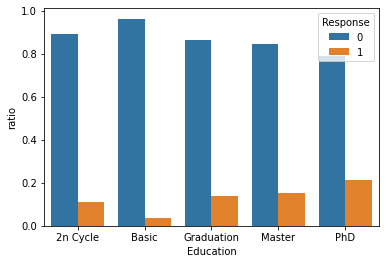

In [ ]:
sns.barplot( data=joined, y='ratio', hue='Response', x='Education')

Di sini kita melihat pola di mana semakin tinggi tingkat education maka kemungkinan meresponse campaign semakin tinggi

In [ ]:
# #Full code at once

# per_response = df.groupby(['Education','Response']).size().to_frame('Total_Per_Response')
# per_education = df.groupby('Education').size().to_frame('Total_Per_Edu')

# joined = per_response.join(
#     per_education,
#     on='Education'
# ).reset_index()

# joined['ratio'] = joined['Total_Per_Response'] / joined['Total_Per_Edu']
# joined

##Marital Status

In [ ]:
df['Marital_Status'].value_counts()

Married     854
Together    569
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

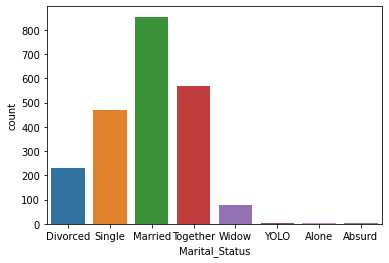

In [ ]:
sns.countplot(data=df, x='Marital_Status')

Kemudian lakukan hal yang sama seperti pada Educuation

In [ ]:
per_response = df.groupby(['Marital_Status','Response']).size().to_frame('Total_Per_Response')
per_Marital_Status= df.groupby('Marital_Status').size().to_frame('Total_Per_Marital_Status')

In [ ]:
joined = per_response.join(
    per_Marital_Status,
    on='Marital_Status'
).reset_index()
joined

,Marital_Status,Response,Total_Per_Response,Total_Per_Marital_Status
0,Absurd,0,1,2
1,Absurd,1,1,2
2,Alone,0,2,3
3,Alone,1,1,3
4,Divorced,0,183,231
5,Divorced,1,48,231
6,Married,0,756,854
7,Married,1,98,854
8,Single,0,364,470
9,Single,1,106,470


In [ ]:
joined['ratio'] = joined['Total_Per_Response'] / joined['Total_Per_Marital_Status']
joined

,Marital_Status,Response,Total_Per_Response,Total_Per_Marital_Status,ratio
0,Absurd,0,1,2,0.500000
1,Absurd,1,1,2,0.500000
2,Alone,0,2,3,0.666667
3,Alone,1,1,3,0.333333
4,Divorced,0,183,231,0.792208
5,Divorced,1,48,231,0.207792
6,Married,0,756,854,0.885246
7,Married,1,98,854,0.114754
8,Single,0,364,470,0.774468
9,Single,1,106,470,0.225532


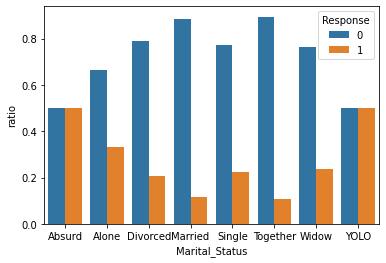

In [ ]:
sns.barplot( data=joined, y='ratio', hue='Response', x='Marital_Status')

Kita hiraukan data yang berlabel Absurd,Alone, dan YOLO karena jumlahnya sedikit, sehingga urutan yang cenderung merespon campaign adalah Widow,Single, dan Divorced secara berturut-turut

In [ ]:
#menghilangkan kategori yang minim data
df= df[~df['Marital_Status'].isin(['Absurd','Alone','YOLO'])]

##Age

In [ ]:
df['Age'] = 2022 - df['Year_Birth']
df['Age']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       52
1       61
2       64
3       55
4       33
        ..
2235    46
2236    45
2237    46
2238    44
2239    53
Name: Age, Length: 2200, dtype: int64

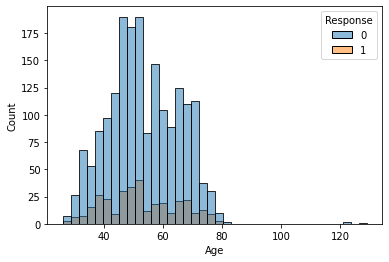

In [ ]:
sns.histplot(data=df, x='Age', hue='Response')

Terlihat ada data yang terpisah berarti ada outliers

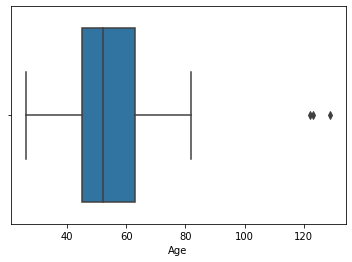

In [ ]:
sns.boxplot(data=df, x='Age')

In [ ]:
df[df['Age'] >= 100 ].shape

(3, 30)

Hanya ada 3 data di atas 100 tahun maka dari itu, kita bisa hapus data tersebut

In [ ]:
df = df[df['Age'] <= 100 ]
df.shape

(2197, 30)

Dikarenakan kita akan sering menggunakan bootsrap, maka kita akan membuat fungsi bootstrap

In [ ]:
def bootstrap (df,column):

  BOOTS_RESULT =[]
  for i in range(200):
    #sampling kelas response = 0
    mean_0 = df[df['Response'] == 0][column].sample(100).mean()
    mean_1 = df[df['Response'] == 1][ column].sample(100).mean()

    BOOTS_RESULT.append((mean_0,0))
    BOOTS_RESULT.append((mean_1,1))

  df_boots = pd.DataFrame(BOOTS_RESULT,columns = [column,'Response'])
  return df_boots

###Bootstrapping

In [ ]:
df_boots = bootstrap(df,'Age')

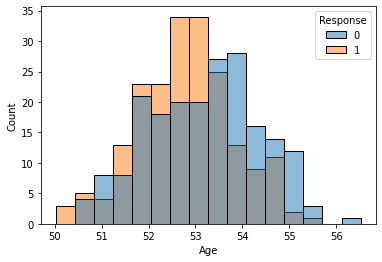

In [ ]:
sns.histplot(data = df_boots, x='Age', hue='Response')

##Day User Active

In [ ]:
#membuat sebuah fungsi untuk mengubah object menjadi tipe date time
from datetime import datetime


def get_user_active(s):
  month, day, year = s.split('/')
  year = '20'+ year
  base = datetime(int(year),int(month),int(day)) #harus digunakan int
  elapse_days = datetime.now() - base
  return elapse_days.days #kita ingin mengambil jumlah hati saja

# input_s = '6/16/14' #
# print(input_s) 
# print(get_user_active(input_s))

df['Active_For'] = df['Dt_Customer'].apply(get_user_active)
df['Active_For']

0       3026
1       3027
2       3060
3       3062
4       3095
        ... 
2235    3492
2236    3536
2237    3586
2238    3590
2239    3679
Name: Active_For, Length: 2197, dtype: int64

In [ ]:
df_boots = bootstrap(df,'Active_For')

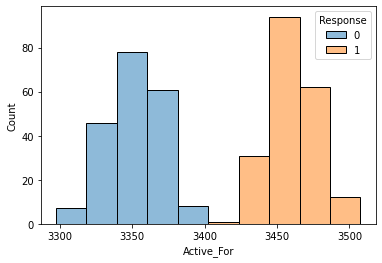

In [ ]:
sns.histplot(data = df_boots, x='Active_For', hue='Response')

Ternyata User dengan rata-rata 3450 hari akan cenderung merespon campaign kita dibanding dengan yang rata-rata 3350 hari

##Ratio Accepted Campaign

In [ ]:
df['Accpt_Cmp_Ratio'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']) / 5

In [ ]:
df_boots = bootstrap(df,'Accpt_Cmp_Ratio')

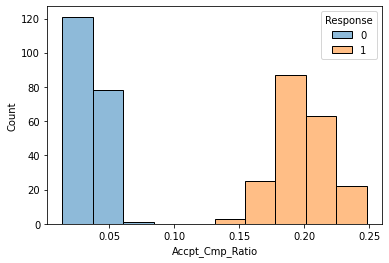

In [ ]:
sns.histplot(data = df_boots, x='Accpt_Cmp_Ratio', hue='Response')

Kemungkinan user yang mengambil campaign biasanya sudah pernah mengambil paling tidak 1 campaign sebelumnya terlihat dari ratio 0.2

##Correlation Analysis

In [ ]:
FEATURE = [
    'Income_Real',
    'Education',
    'Marital_Status', 
    'Age',
    'Active_For',
    'Accpt_Cmp_Ratio'
]

TARGET = 'Response'

In [ ]:
X = df[FEATURE]
y = df[TARGET]

In [ ]:
X.shape

(2197, 6)

#Train & Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train

,Income_Real,Education,Marital_Status,Age,Active_For,Accpt_Cmp_Ratio
2,67267.0,Graduation,Married,64,3060,0.0
1613,80910.0,2n Cycle,Single,36,3619,0.0
425,83003.0,Graduation,Together,57,3496,0.2
1276,21255.0,Master,Together,48,3172,0.0
1428,52332.0,Graduation,Divorced,63,3318,0.2
...,...,...,...,...,...,...
1398,73803.0,Graduation,Married,65,3710,0.2
2056,76542.0,PhD,Together,66,3469,0.0
1678,54342.0,2n Cycle,Together,66,3374,0.0
740,9548.0,Basic,Divorced,46,3703,0.0


In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: \n", y_train.value_counts())
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: \n", y_test.value_counts())

Shape of X_train:  (1757, 6)
Shape of y_train: 
 0    1493
1     264
Name: Response, dtype: int64
Shape of X_test:  (440, 6)
Shape of y_test: 
 0    374
1     66
Name: Response, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
FEATURE_CAT = ['Education', 'Marital_Status']
FEATURE_NUM = ['Income_Real','Age', 'Active_For', 'Accpt_Cmp_Ratio']

scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False) #Sparse adalah matiks yang isinya kebanyakan 0. False berarti mengambil yang isinya 1 saja

#Fit data hanya digunakan data Training
scaler.fit(X_train[FEATURE_NUM])
encoder.fit(X_train[FEATURE_CAT])

OneHotEncoder(sparse=False)

In [ ]:
X_train_scaled = scaler.transform(X_train[FEATURE_NUM])
X_train_encoded = encoder.transform(X_train[FEATURE_CAT])

In [ ]:
X_train_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
X_train_encoded.shape , X_train_scaled.shape

((1757, 10), (1757, 4))

In [ ]:
X_stack = np.hstack((X_train_scaled, X_train_encoded))

In [ ]:
X_stack.shape

(1757, 14)

Kemudian kita akan membuat fungsi untuk transform di atas

In [ ]:
def transform(X):
  X_scaled = scaler.transform(X[FEATURE_NUM])
  X_encoded = encoder.transform(X[FEATURE_CAT])
  X_stack = np.hstack((X_scaled, X_encoded))
  return X_stack

X_train_stack = transform(X_train)
X_test_stack = transform(X_test)

In [ ]:
X_train_stack.shape

(1757, 14)

In [ ]:
#Pembuatan model Machine Learning
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = [
    ('svm',SVC()),
    ('RF',RandomForestClassifier()),
    ('LogReg',LogisticRegression())
]

for model_name, model in models:
  print('Training {}'.format(model_name))

  model.fit(X_train_stack, y_train)
  predicted = model.predict(X_test_stack)

  prec = precision_score (y_test,predicted)
  recall = recall_score(y_test,predicted)

  print("Model:{},Prec: {:.2F},Recall: {:.2F}".format(
      model_name,prec,recall
  ))

# Model:svm,Prec: 0.77,Recall: 0.26
# Model dengan class_weight = balanced
# Model:svm,Prec: 0.43,Recall: 0.65


Training svm
Model:svm,Prec: 0.77,Recall: 0.26
Training RF
Model:RF,Prec: 0.75,Recall: 0.32
Training LogReg
Model:LogReg,Prec: 0.67,Recall: 0.24


Kita akan fokus ke precision sehinggan SVM dipilih sebagai model kita. Seperti kita lihat Ada trade off dimana recallnya makin besar tetapi precision makin kecil ketika kita menggunakan parameter class weight = 'Balanced'.

#Sampling Method

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy={1: 500}) #Class yg kecil ingin kita banyakan
under = RandomUnderSampler(sampling_strategy={0: 500}) #Class yg banyak ingin kita sedikitkan

X_train_sample, y_train_sample = over.fit_resample(X_train, y_train)
X_train_sample, y_train_sample = under.fit_resample(X_train_sample, y_train_sample)

In [ ]:
y_train_sample.value_counts()

0    500
1    500
Name: Response, dtype: int64

Kita lihat bahwa datanya sudah balanced sekarang. Jangan terlalu banyak melakukan oversampling dikarenakan data yang sama bisa muncul kembali/berulang.

In [ ]:
X_train_sample_stack = transform(X_train_sample)

models = [
    ('svm',SVC()),
    ('RF',RandomForestClassifier()),
    ('LogReg',LogisticRegression())
]

for model_name, model in models:
  print('Training {}'.format(model_name))

  model.fit(X_train_sample_stack, y_train_sample)
  predicted = model.predict(X_test_stack)

  prec = precision_score (y_test,predicted)
  recall = recall_score(y_test,predicted)

  print("Model:{},Prec: {:.2F},Recall: {:.2F}".format(
      model_name,prec,recall
  ))


Training svm
Model:svm,Prec: 0.39,Recall: 0.62
Training RF
Model:RF,Prec: 0.37,Recall: 0.58
Training LogReg
Model:LogReg,Prec: 0.40,Recall: 0.65


Tenyata hasil model svm kita menghasilkan precision yang lebih kecil dibandingkan hasil sebelumnya. Maka dari itu, sebaiknya tidak dilakukan oversampling/undersampling.

#Hyperparameter Search

Di sini kita akan menentukan parameter apa yang terbaik dari suatu algoritma pada kasus ini adalah SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

PARAMETER_GRID ={
    'C' : [0.1,0.01,0.05,0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'],
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 10}]
}

cv= GridSearchCV(SVC(),PARAMETER_GRID, verbose=2, scoring='precision') #verbose agar terlihat prosesnya

In [ ]:
cv.fit(X_train_stack, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.1s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=poly; total time=   0.1s
[CV] END C=0.01, c

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 2}, gamma=auto, kernel=sigmoid; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=linear; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=poly; total time=   0.1s
[CV] END C=0.01, class_weight={0: 1, 1: 10}, gamma=scale, kernel=rbf; total time=   0.2s
[

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.05, 0.5],
                         'class_weight': ['balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 10}],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='precision', verbose=2)

In [ ]:
cv.best_params_

{'C': 0.05, 'class_weight': {0: 1, 1: 2}, 'gamma': 'auto', 'kernel': 'poly'}

In [ ]:
predicted = cv.predict(X_test_stack)

prec = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
    
print("Prec: {:.2F}, Recall: {:.2F}".format(
    prec, recall
))

Prec: 0.87, Recall: 0.20


Precision tertinggi yang didapat dalah 82%